Question 3 a)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
N = 80e6
gamma = 0.125
beta = 3.86e-9
I0 = 138

# Initial conditions
S0 = N
I0 = I0
R0 = 0

# Time grid
T = np.linspace(0, 100, 1001)  # 100 days with 1001 time points

# SIR model differential equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Solve the SIR model numerically
y0 = [S0, I0, R0]
solution = odeint(SIR_model, y0, T, args=(beta, gamma))
S, I, R = solution.T

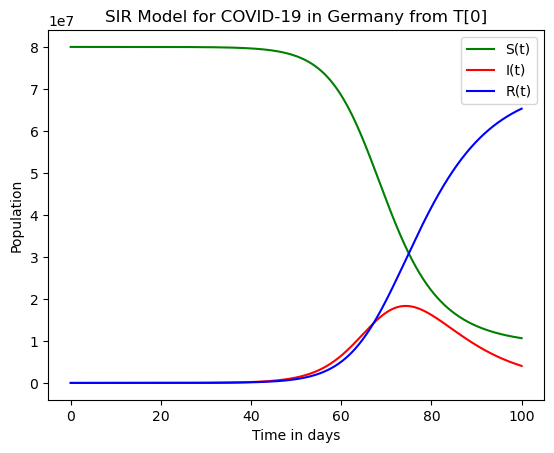

In [2]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(T, S, label='S(t)', color = 'g')
ax.plot(T, I, label='I(t)', color = 'r')
ax.plot(T, R, label='R(t)', color = 'b')
ax.set(ylabel = 'Population', xlabel = 'Time in days', title = 'SIR Model for COVID-19 in Germany from T[0]')
ax.legend()
plt.show()

Question 2 b)

In [3]:
# Parameters
beta_crit = 2.365e-9
beta_above = 2.37e-9
beta_decline = 1.55e-9

# Initial conditions
I20 = 4954
S20 = N - I20
R20 = 0

# Time grid
T20 = np.linspace(20, 200, 1001)  
x = np.linspace(30000, 30000, 1001)

# Solve the SIR model numerically
y20 = [S20, I20, R20]
solution = odeint(SIR_model, y20, T, args=(beta_crit, gamma))
S_crit, I_crit, R_crit = solution.T

solution = odeint(SIR_model, y20, T, args=(beta_above, gamma))
S_above, I_above, R_above = solution.T

solution = odeint(SIR_model, y20, T, args=(beta_decline, gamma))
S_decline, I_decline, R_decline = solution.T

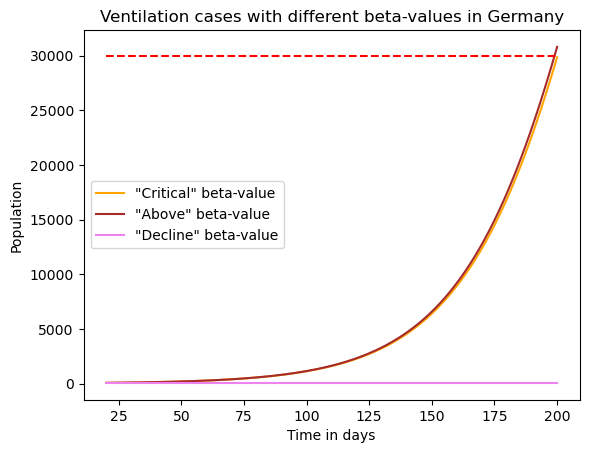

In [11]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(T20, I_crit * 0.0132, label='"Critical" beta-value', color = 'orange')
ax.plot(T20, I_above * 0.0132, label='"Above" beta-value', color = 'brown')
ax.plot(T20, I_decline * 0.0132, label='"Decline" beta-value', color = 'violet')
ax.plot(T20, x, linestyle = 'dashed', color = 'r')
ax.set(ylabel = 'Population', xlabel = 'Time in days', title = 'Ventilation cases with different beta-values in Germany')
ax.legend()
plt.show()

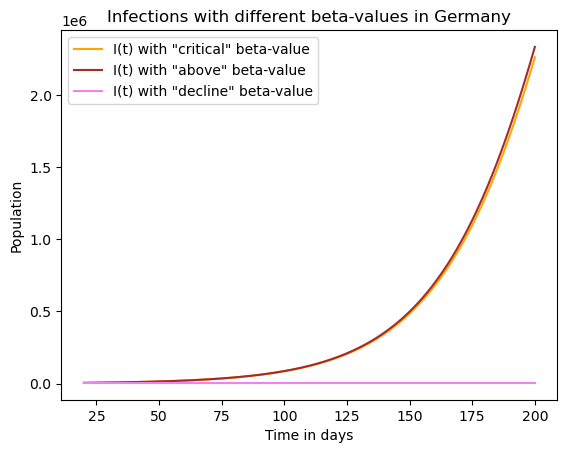

In [7]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(T20, I_crit, label='I(t) with "critical" beta-value', color = 'orange')
ax.plot(T20, I_above, label='I(t) with "above" beta-value', color = 'brown')
ax.plot(T20, I_decline, label='I(t) with "decline" beta-value', color = 'violet')
ax.set(ylabel = 'Population', xlabel = 'Time in days', title = 'Infections with different beta-values in Germany')
ax.legend()
plt.show()

The critical beta-value is 2.365e-9, the beta-value slightly above this critical value is 2.37e-9 and the beta-value with declining infections is 1.55e-9.

Question 3 c)

In [6]:
# Calculate beta for R0 = 1
beta_decline_calc = (1 / N) * gamma

# Calculate the percentage reduction
percentage_reduction = ((beta - beta_decline_calc) / beta) * 100

print(f"Percentage reduction in beta for R0 = 1: {percentage_reduction:.2f}%")

Percentage reduction in beta for R0 = 1: 59.52%
